In [93]:
import os
import json
from matplotlib.image import imread, imsave
from matplotlib.pyplot import imshow, show, close
from matplotlib import pyplot as plt
from collections import OrderedDict
import math
import matplotlib.image as mpimg
import cv2

In [91]:
# PATHS
read_directory = 'temp/alpha_dqn_train/'
evaluation_folder = read_directory + 'evaluations/'
observation_folder = read_directory + 'observations/'
benchmarks_path = read_directory + 'benchmarks.json'
configuration_path = read_directory + 'configuration.json'
slideshow_path = read_directory + 'slideshows/'
if not os.path.exists(slideshow_path):
    os.makedirs(slideshow_path)

# EVALUATIONS

In [21]:
# read evaluations
evaluations = {}
evaluation_files = [file for file in os.listdir(evaluation_folder)]
for evaluation_file in evaluation_files:
    evaluation_set_number = int(evaluation_file.split('.')[0])
    evaluations[evaluation_set_number] = json.load(open(evaluation_folder + evaluation_file, 'r'))
evaluations = dict(OrderedDict(sorted(evaluations.items())))
print(json.dumps(evaluations[1], indent=4, sort_keys=True))
# evaluation
    # episode
        # step
            # state

{
    "0": {
        "1": {
            "distance": 100.16024471165524,
            "done": true,
            "drone_position": [
                0.0,
                0.0,
                0.6640592217445374
            ],
            "has_collided": true,
            "nEpisodes": "evaluation",
            "nSteps": 1,
            "observation_component": "Observation_2",
            "reward_from_Avoid__1": -1,
            "reward_from_RelativePoint__1": -0.0017804967961692064,
            "rl_output": 1.0,
            "termination_reason": "collided",
            "total_reward": -0.3345203311974462,
            "transcribed_action": "down"
        }
    },
    "1": {
        "1": {
            "distance": 100.0482473058479,
            "done": false,
            "drone_position": [
                0.0,
                0.0,
                -1.8916015625
            ],
            "has_collided": false,
            "nEpisodes": "evaluation",
            "nSteps": 1,
            "observat

In [26]:
evaluations.keys()

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35])

In [31]:
# process evaluations
final_variables = {}
for evaluation in evaluations:
    for episode_str in evaluations[evaluation]:
        episode = int(episode_str)
        episode_final_variables = {}
        for step_str in evaluations[evaluation][episode_str]:
            step = int(step_str)
            state = evaluations[evaluation][episode_str][step_str]
            for variable in state:
                if variable not in final_variables:
                    final_variables[variable] = {}
                if episode not in final_variables[variable]:
                    final_variables[variable][episode] = []
                episode_final_variables[variable] = state[variable]
        for variable in episode_final_variables:
            final_variables[variable][episode].append(episode_final_variables[variable])
print(json.dumps(final_variables['distance'], indent=4, sort_keys=True))
# variable
    # episode
        # final values over all evaluations

{
    "0": [
        100.16024471165524,
        110.66700169752461,
        98.30368597857439,
        101.21785826131055,
        100.83639280461111,
        110.75339602428342,
        110.75817217951115,
        115.04087387336631,
        99.6122977234958,
        100.71374516139414,
        100.51832133566592,
        62.03711325441545,
        88.22018762799591,
        95.54005196283198,
        101.50899640371513,
        111.76051866302858,
        100.16117395274813,
        100.15214206327488,
        77.85209375068861,
        54.04256598036545,
        97.15309134768617,
        72.2328834620726,
        60.40214952866247,
        54.27996477470324,
        100.16111919445898,
        73.74300523428465,
        110.3222721674384,
        111.7306439060826,
        51.46581978255146,
        111.0635966878449,
        9.92199119876025,
        54.413107245004035,
        110.57004597256973,
        53.42685306753365,
        8.35332612666967
    ],
    "1": [
        100.1

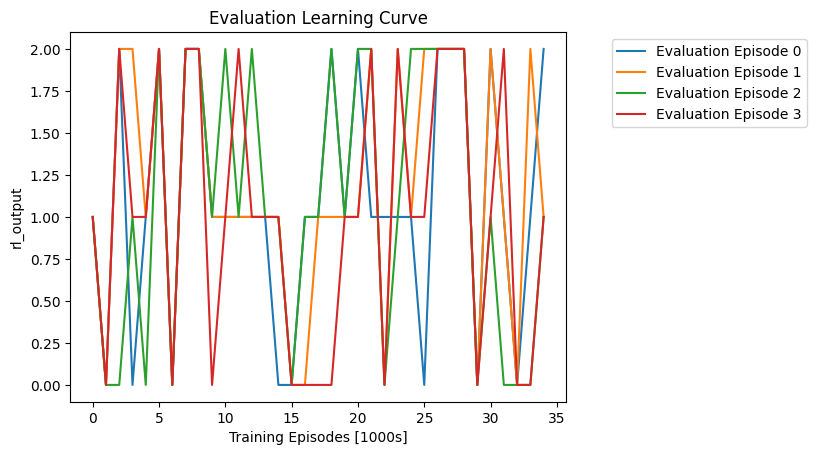

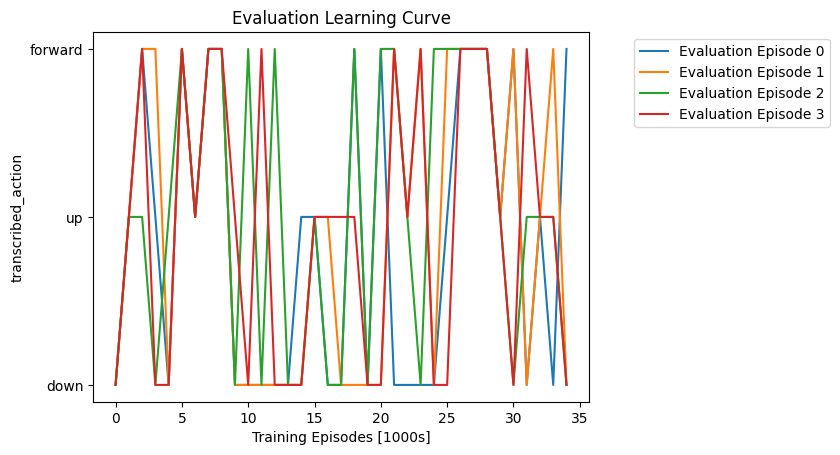

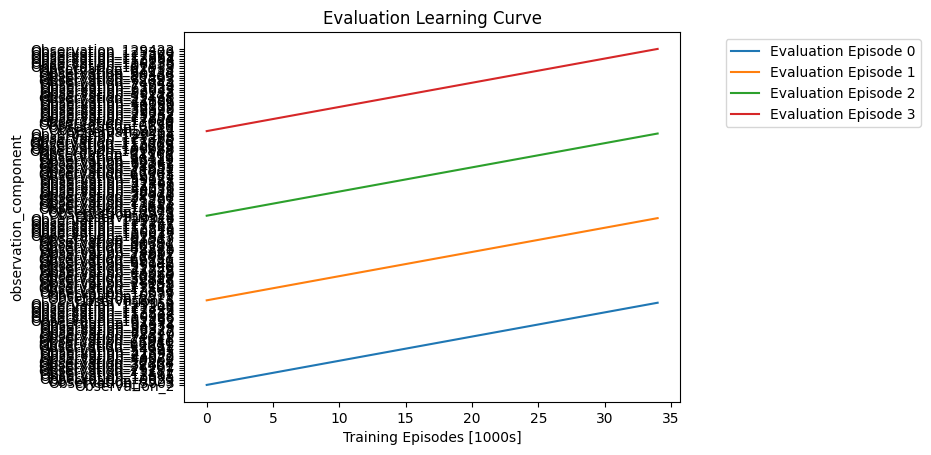

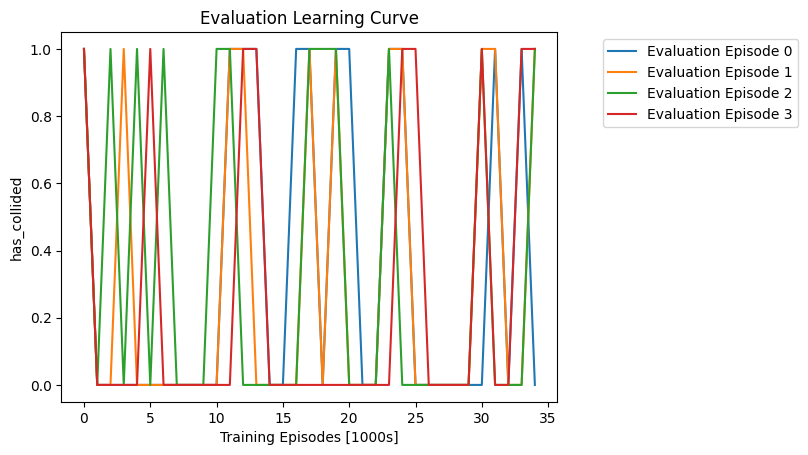

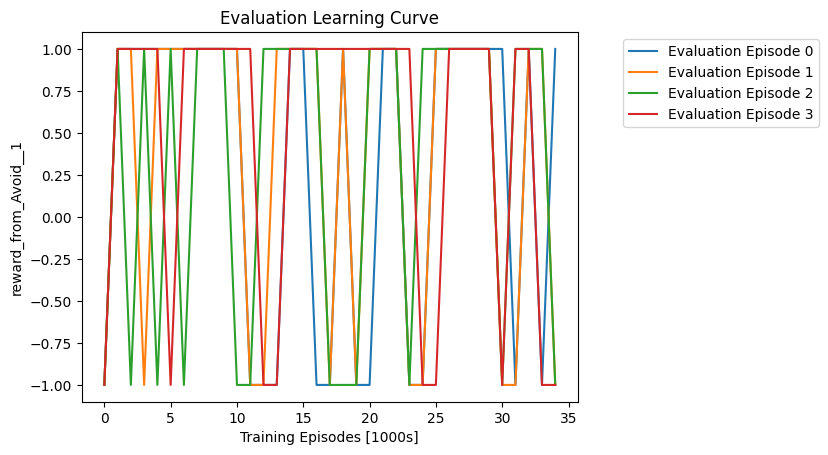

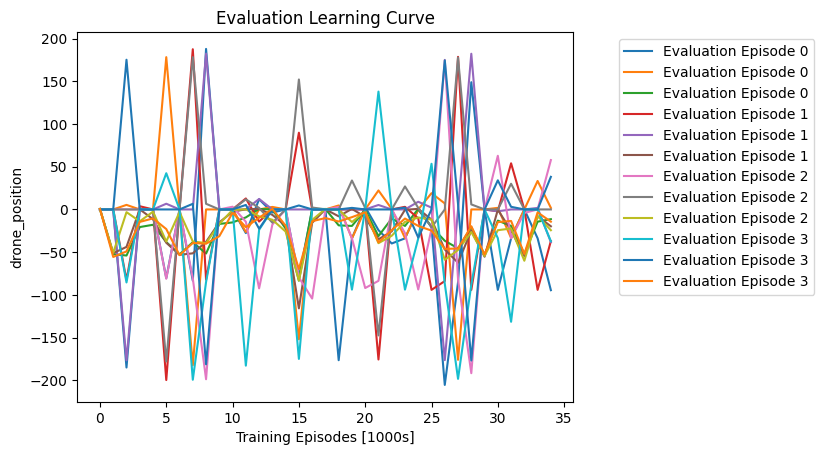

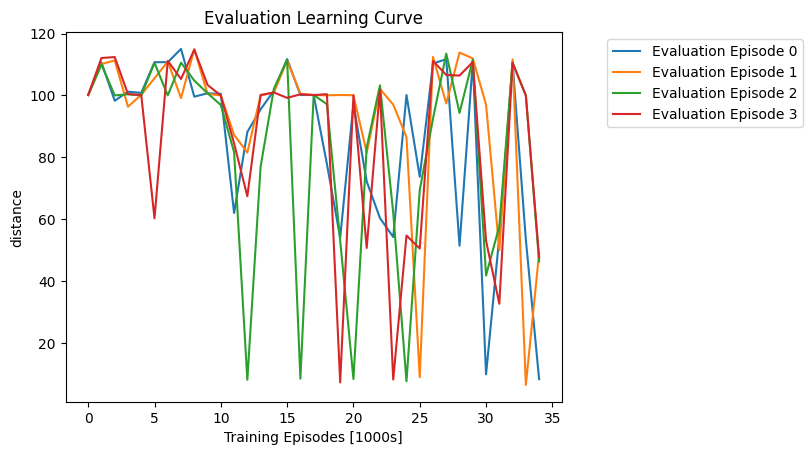

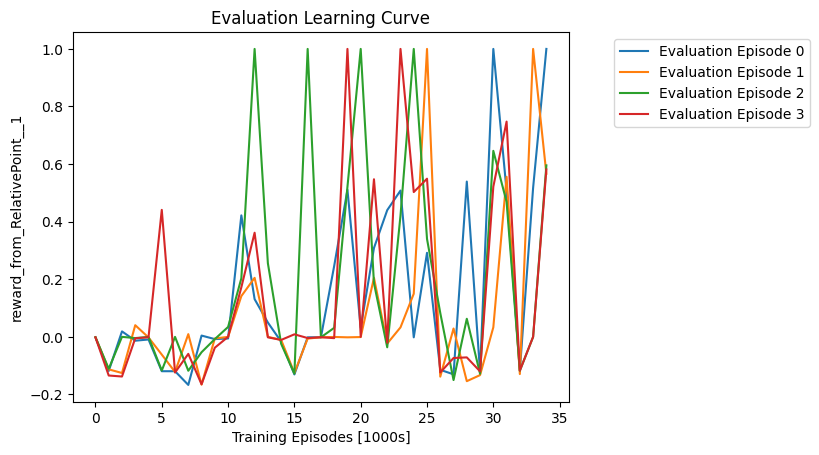

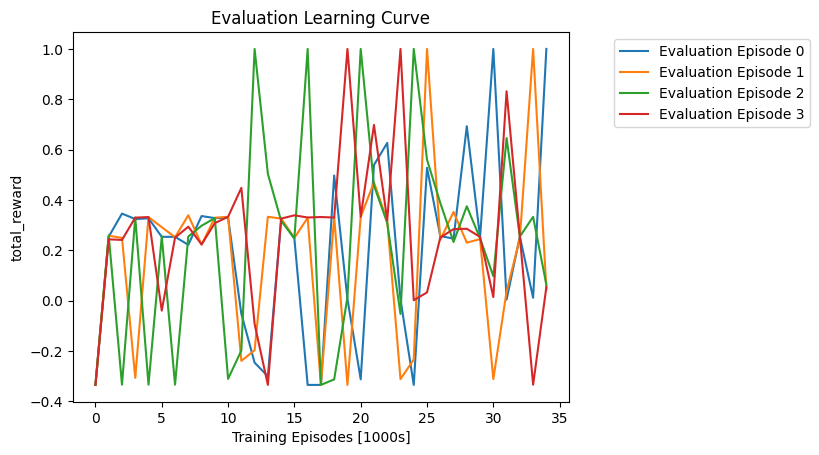

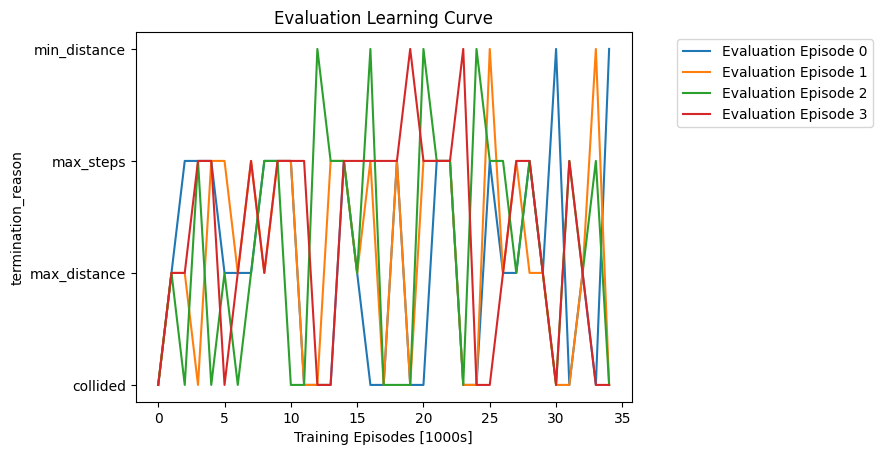

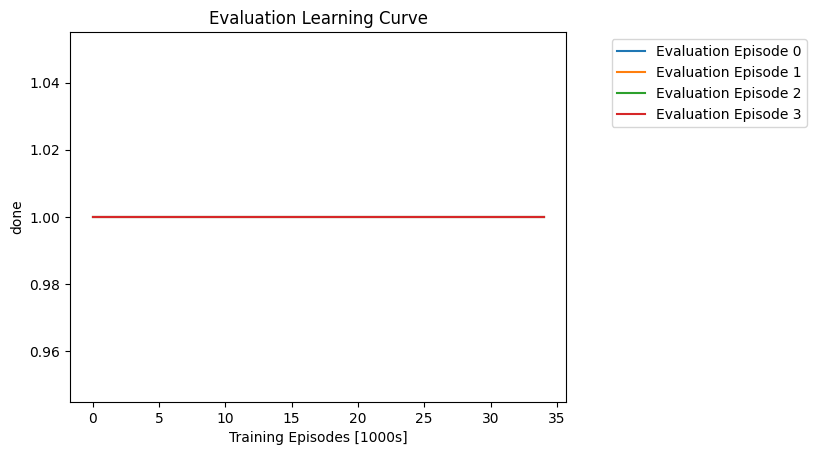

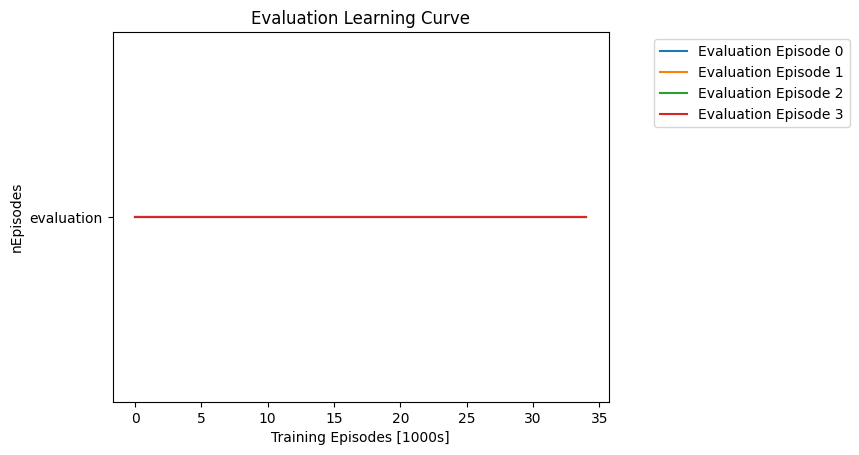

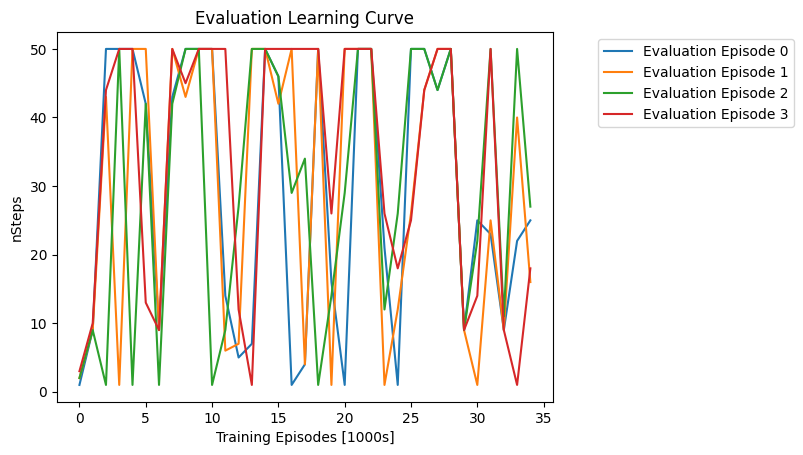

In [43]:
# plot final values
for variable in final_variables:
    plt.title('Evaluation Learning Curve')
    plt.xlabel('Training Episodes [1000s]')
    plt.ylabel(variable)
    for episode in final_variables[variable]:
        values = final_variables[variable][episode]
        plt.plot(values, label='Evaluation Episode ' + str(episode))
    plt.legend(bbox_to_anchor=(1.5, 1), loc='upper right')
    plt.show()

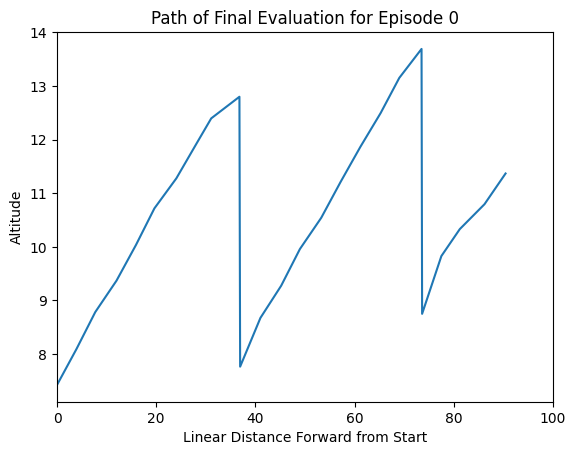

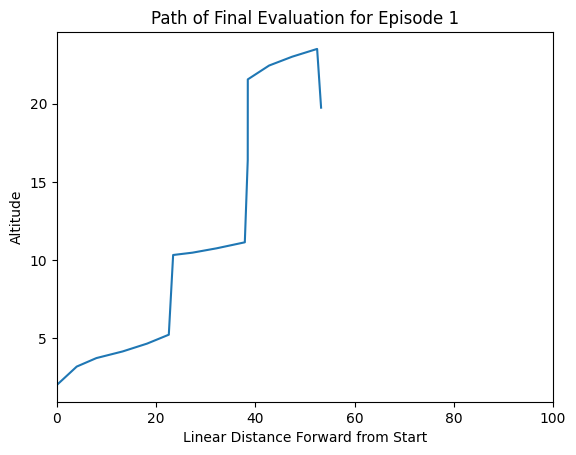

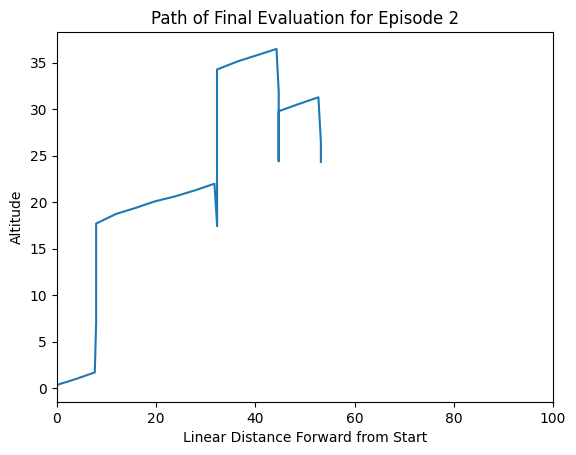

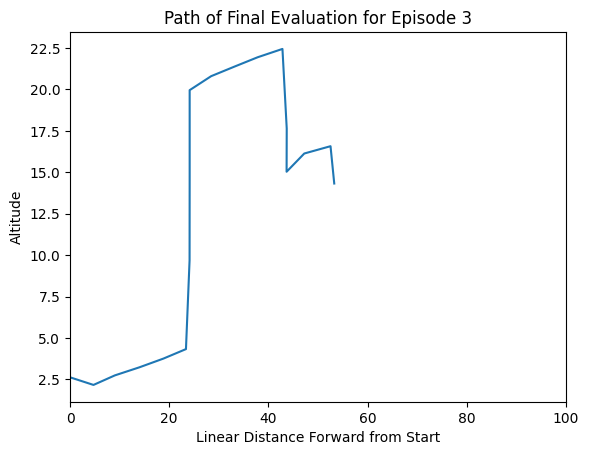

In [67]:
# plot final paths
last_evaluation = list(evaluations.keys())[-1]
last_evaluations = evaluations[last_evaluation]
last_ls = {}
last_zs = {}
for episode in last_evaluations:
    last_ls[episode] = []
    last_zs[episode] = []
    first_position = last_evaluations[episode]['1']['drone_position']
    for step in last_evaluations[episode]:
        state = last_evaluations[episode][step]
        position = state['drone_position']
        line_distance = math.sqrt((position[0] - first_position[0])**2 + (position[1] - first_position[1])**2)
        last_ls[episode].append(line_distance)
        last_zs[episode].append(abs(position[2]))
for episode in last_paths:
    plt.title('Path of Final Evaluation for Episode ' + str(episode))
    plt.xlabel('Linear Distance Forward from Start')
    plt.ylabel('Altitude')
    plt.xlim(0, 100)
    plt.plot(last_ls[episode], last_zs[episode])
    plt.show()

Episode 0


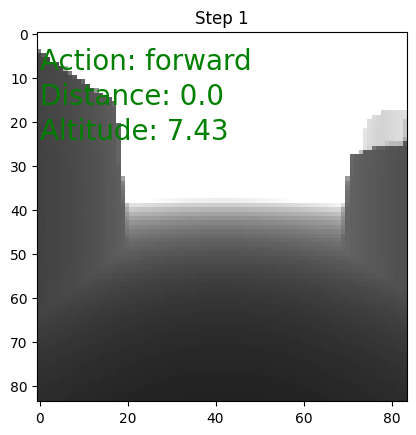

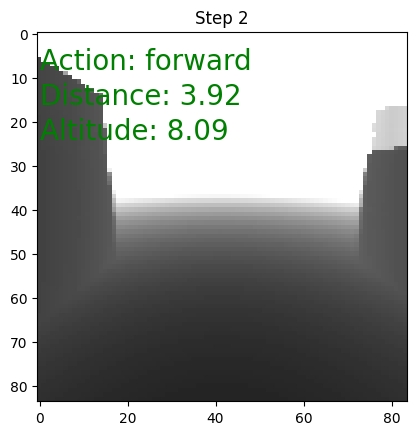

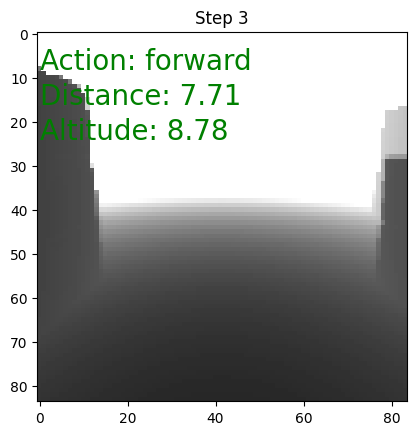

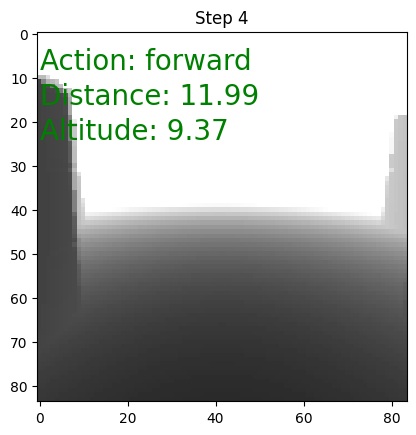

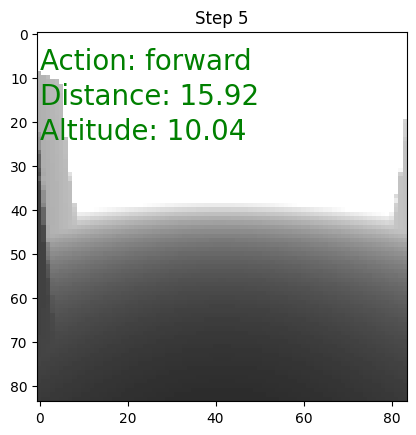

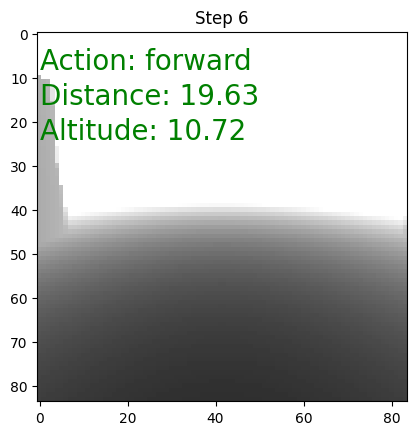

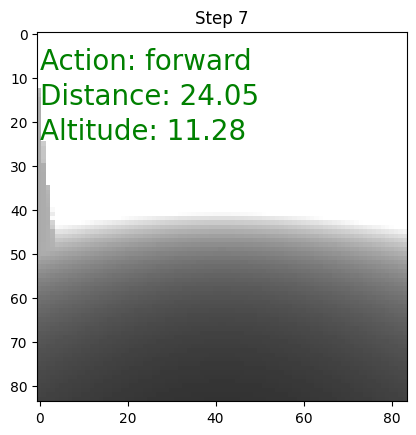

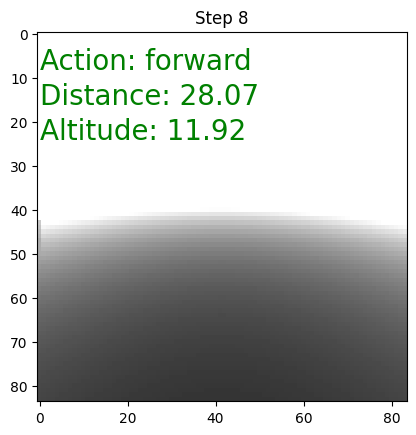

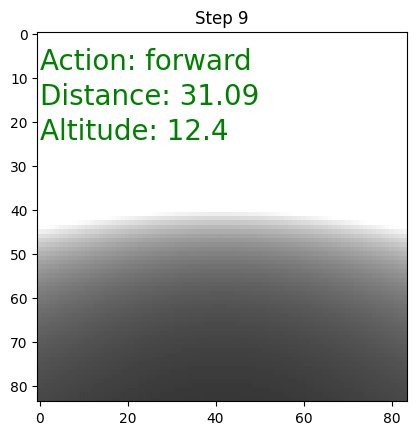

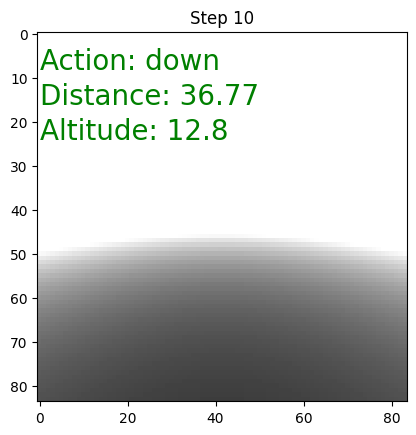

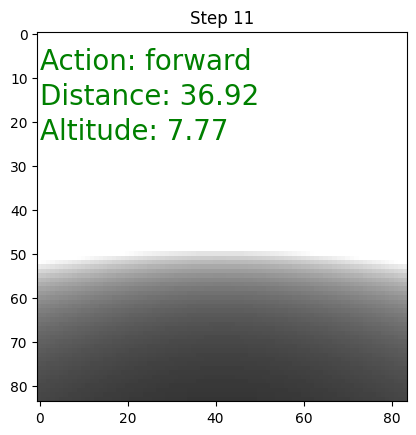

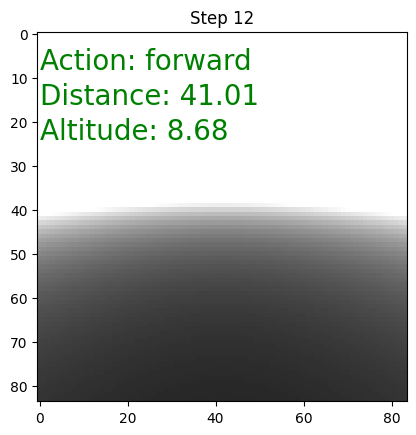

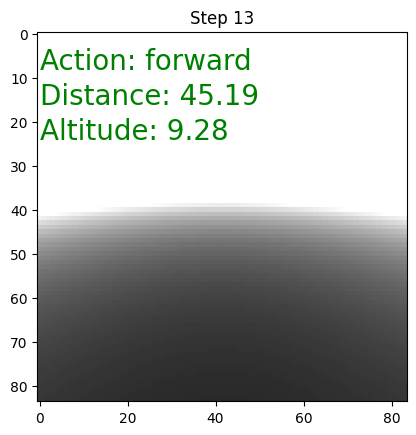

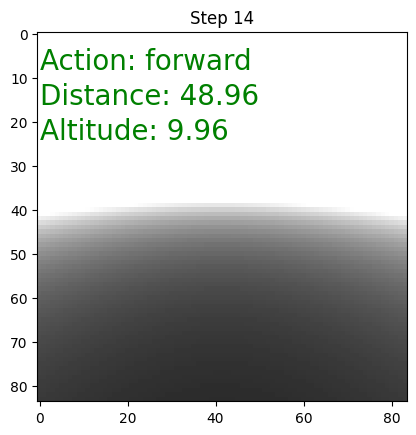

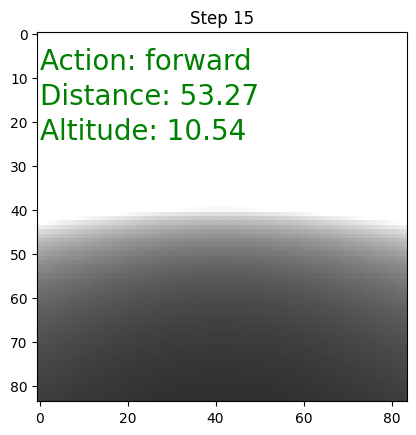

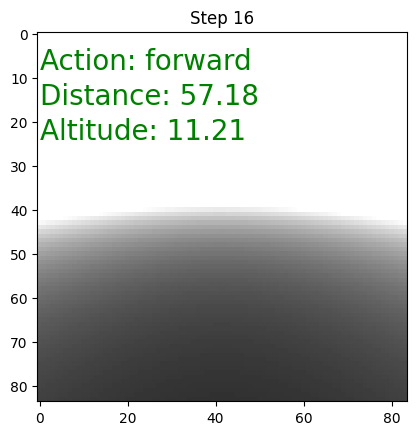

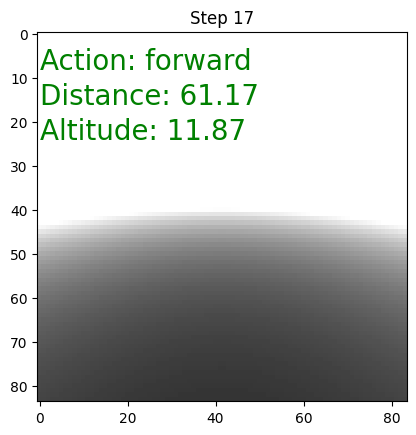

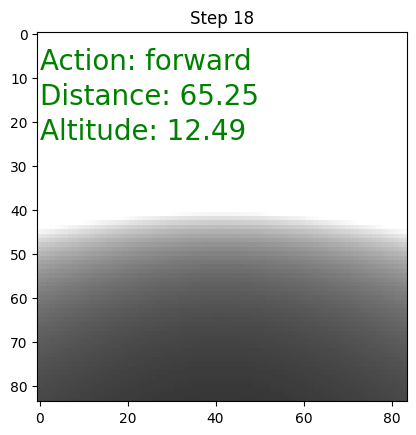

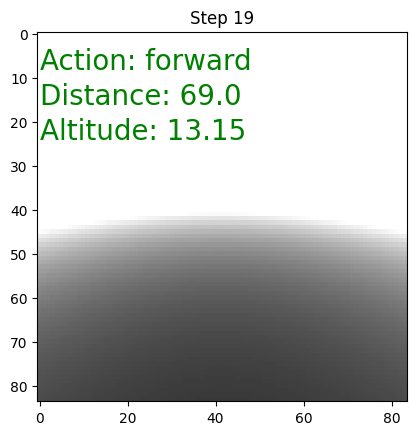

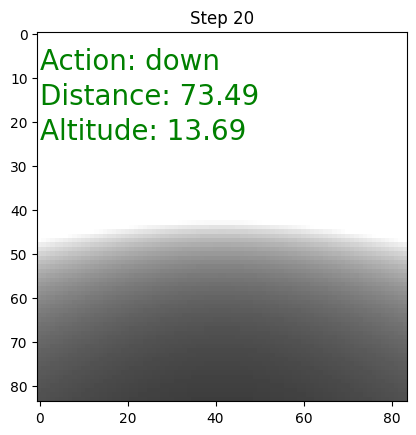

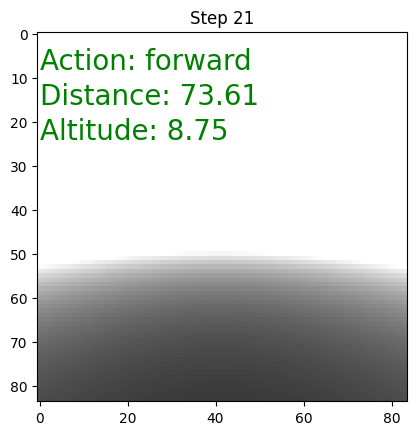

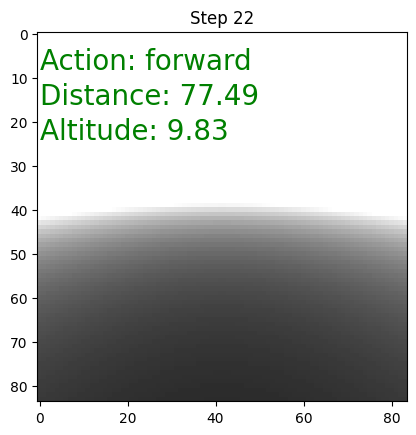

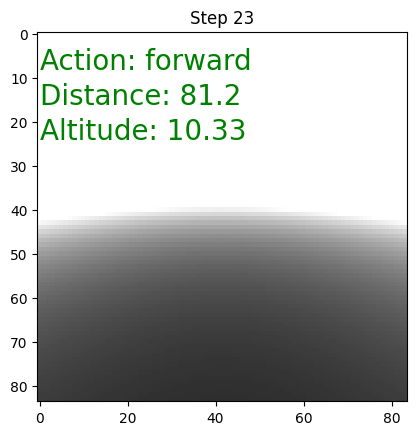

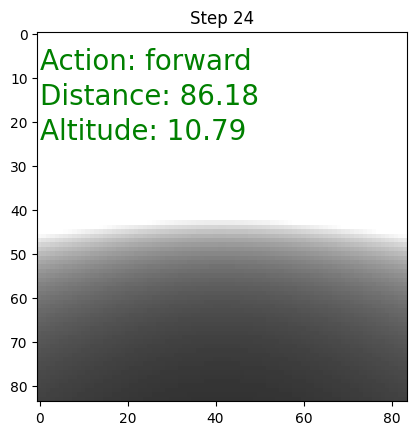

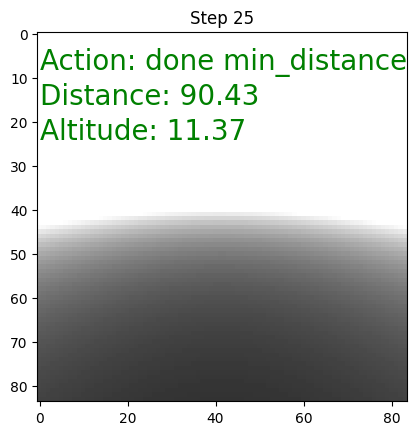

Episode 1


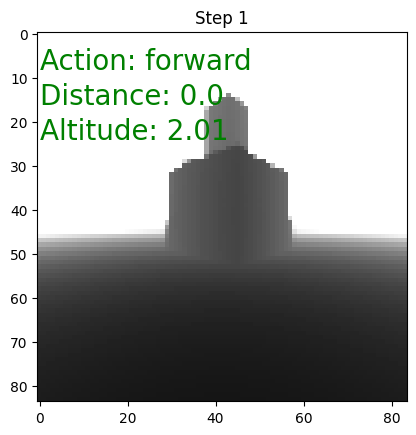

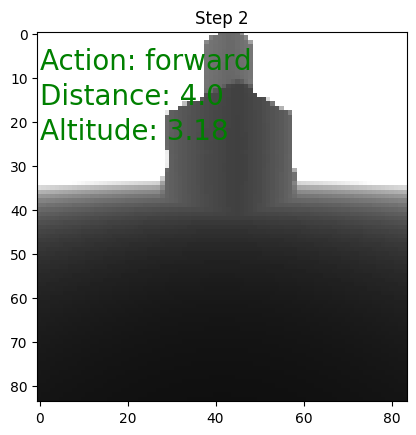

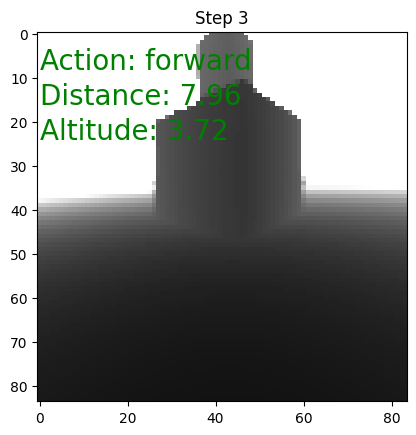

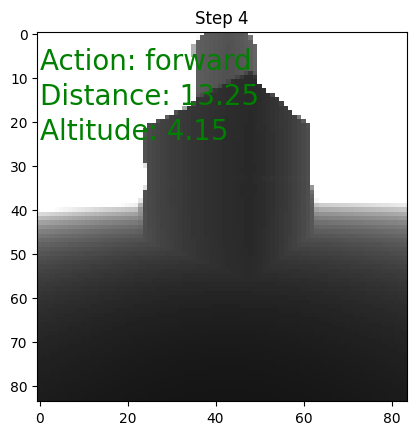

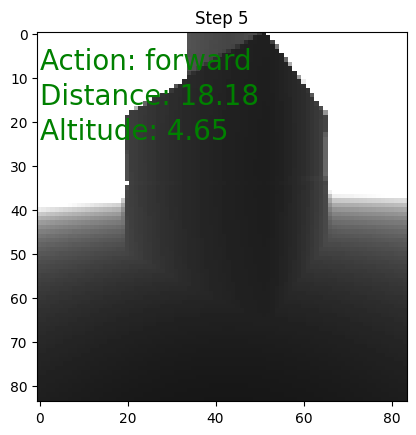

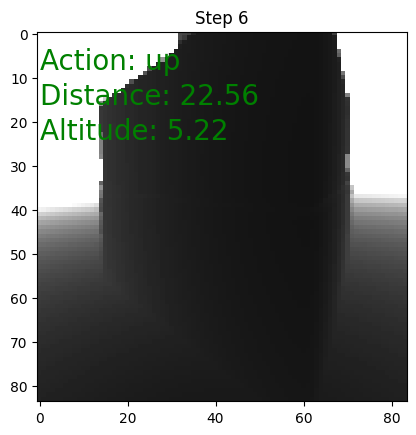

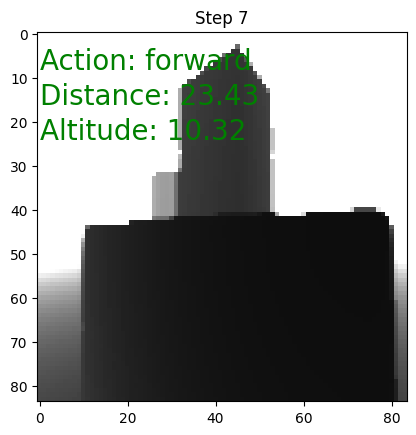

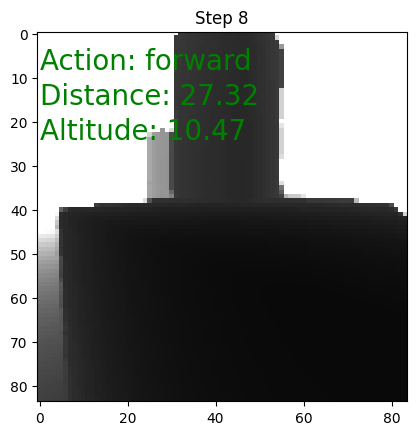

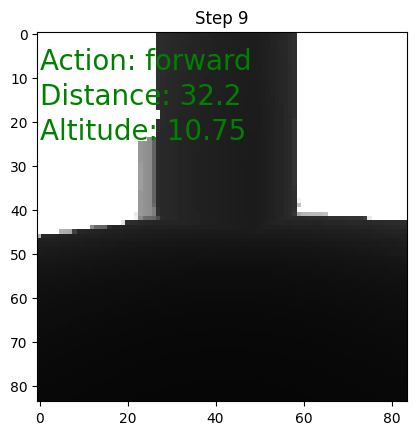

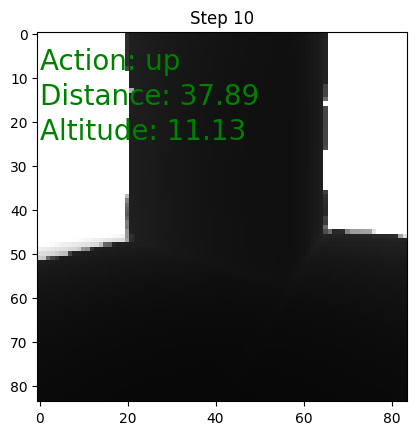

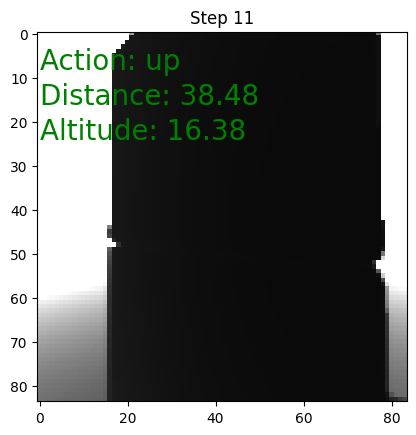

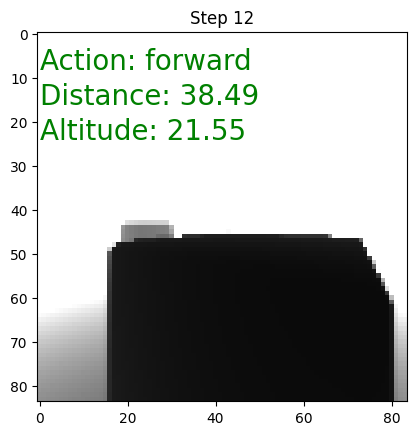

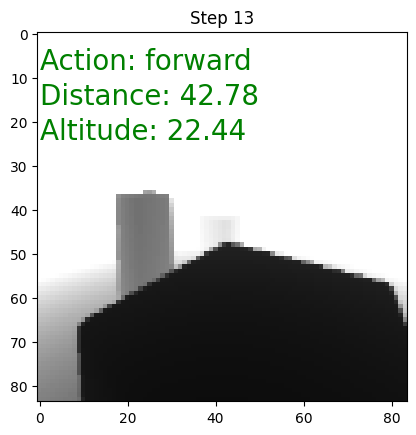

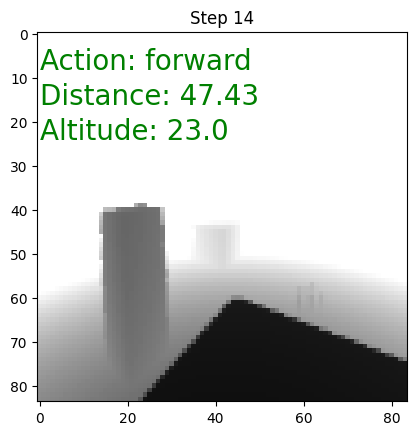

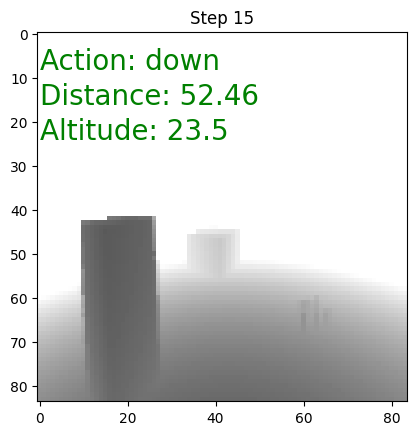

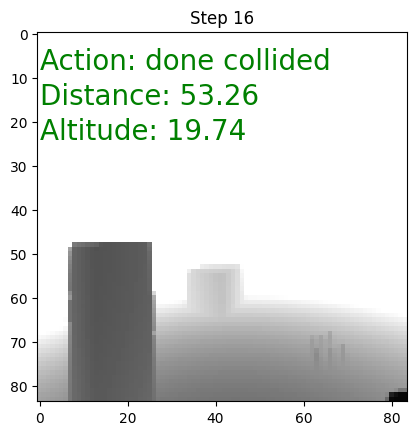

Episode 2


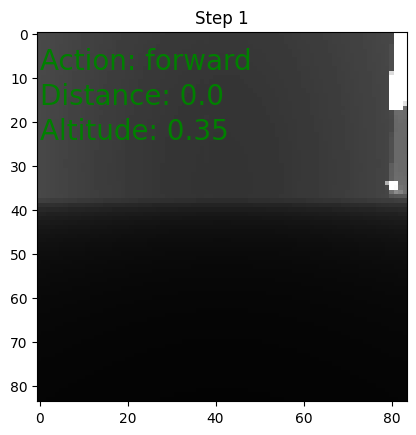

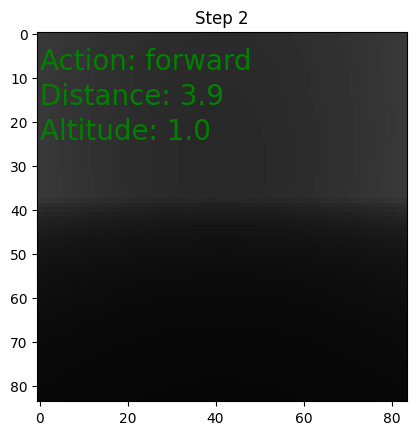

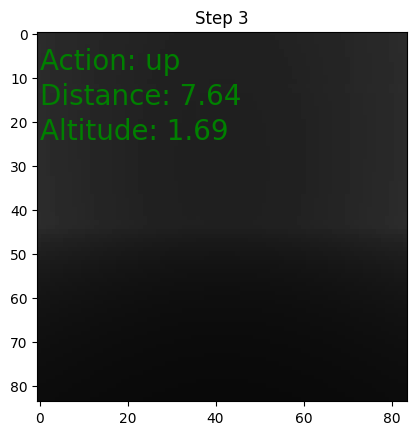

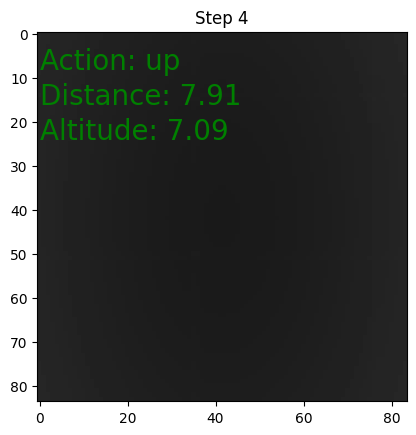

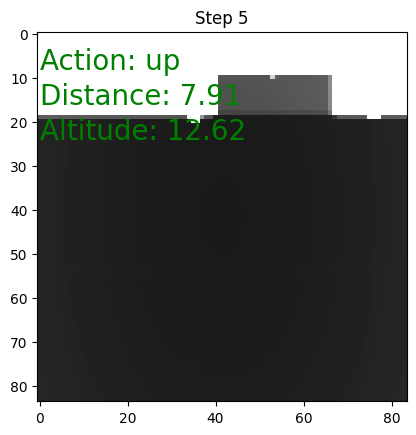

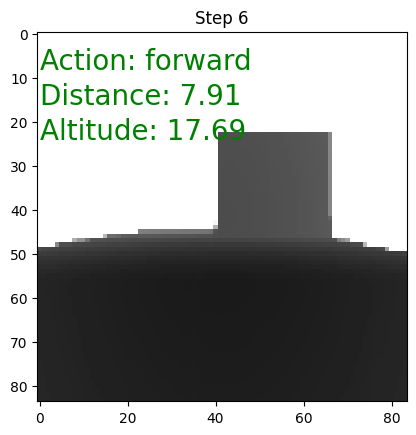

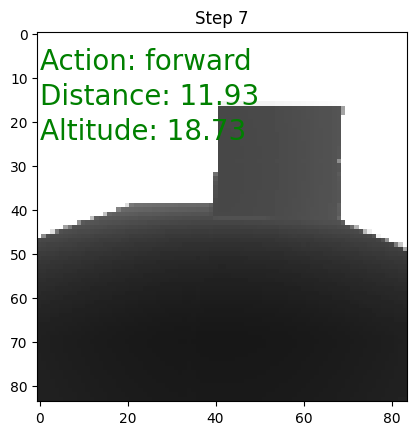

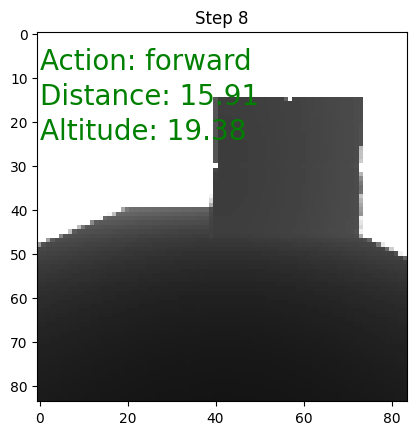

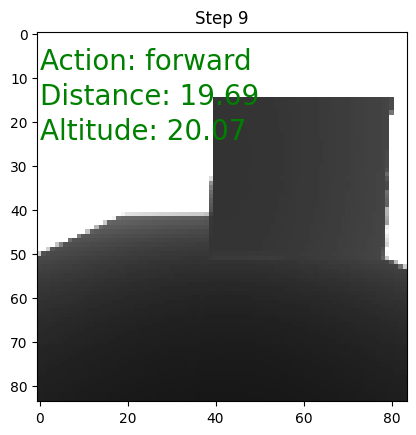

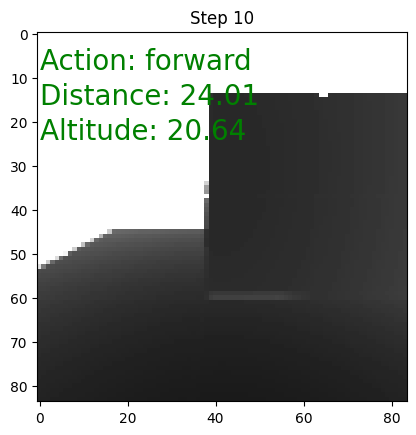

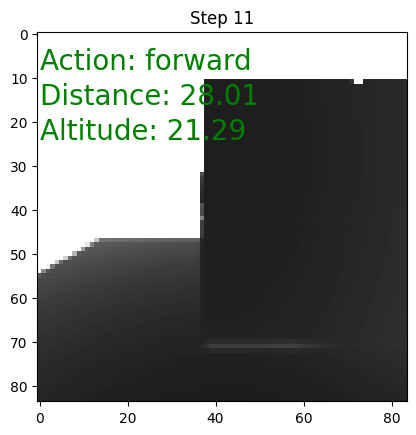

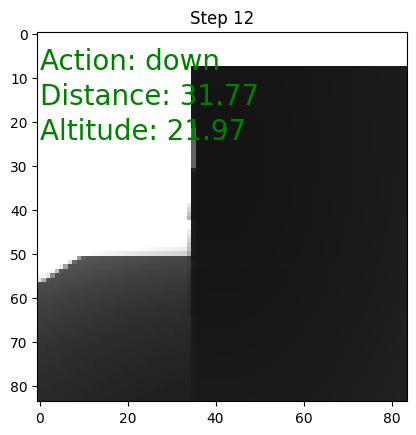

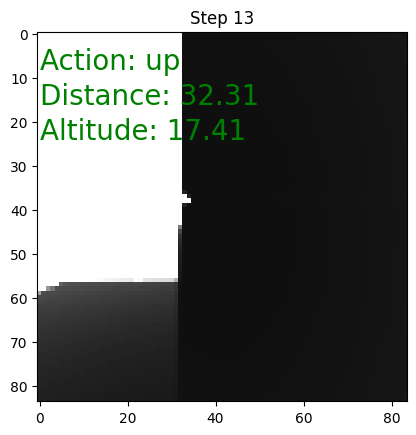

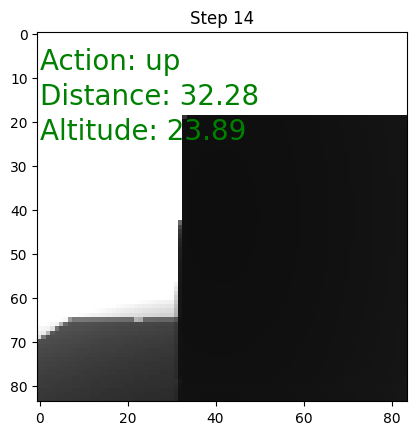

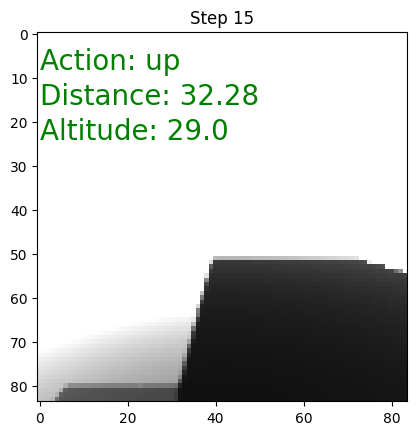

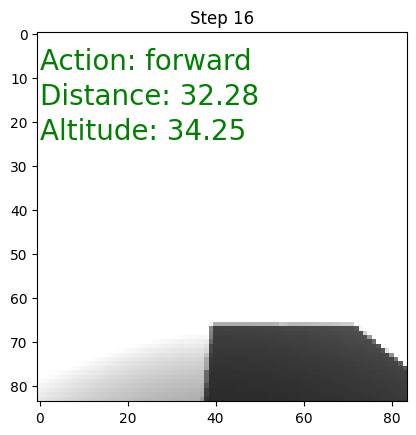

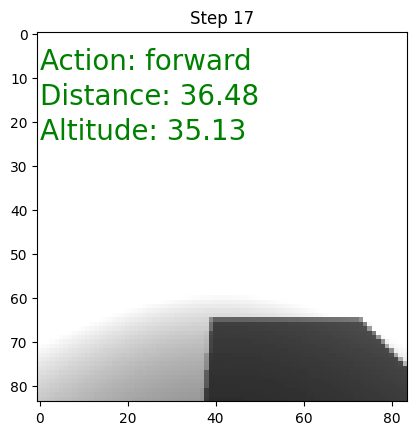

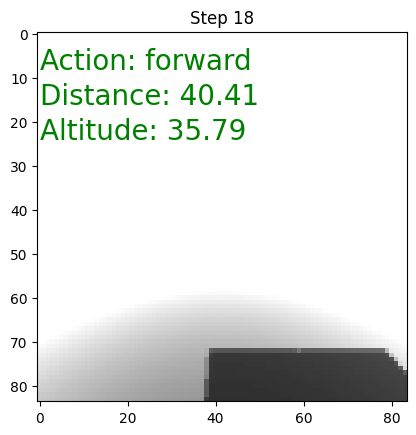

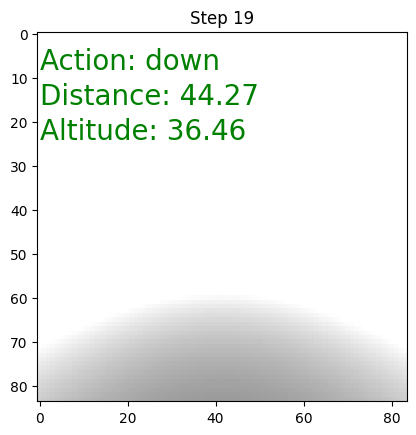

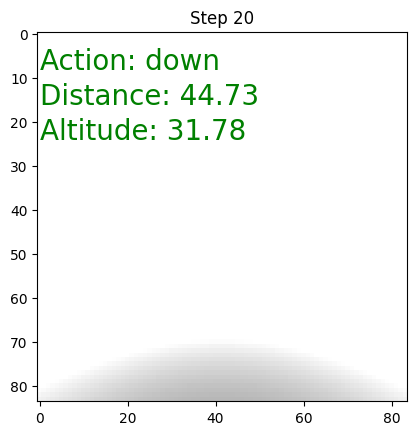

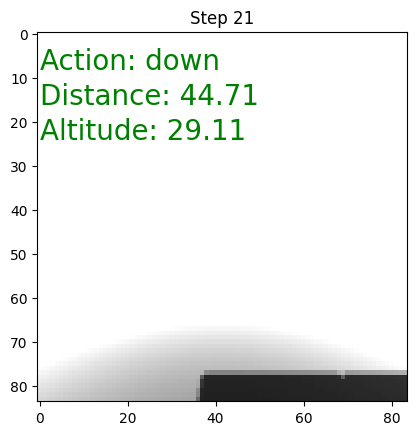

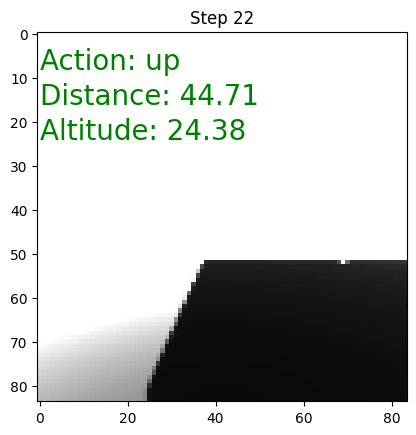

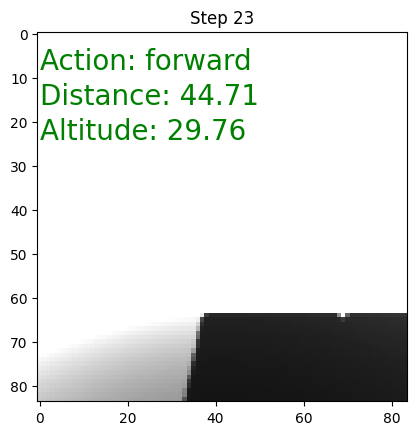

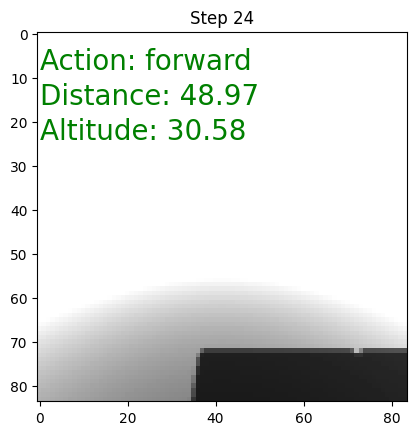

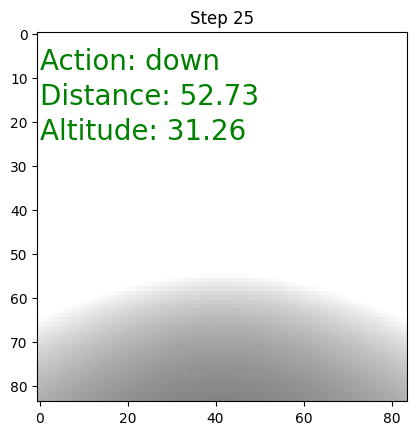

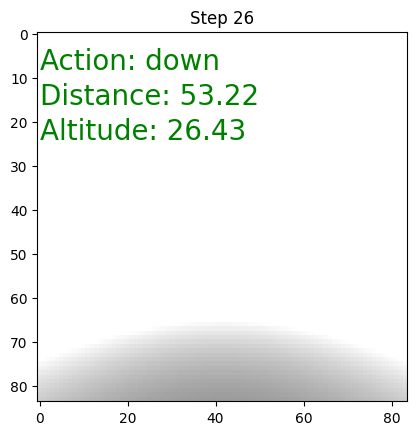

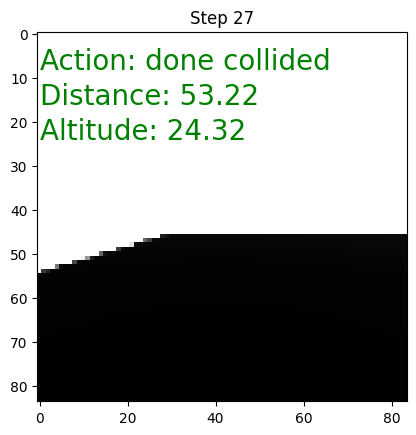

Episode 3


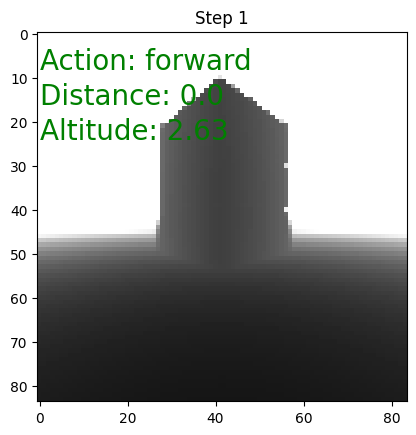

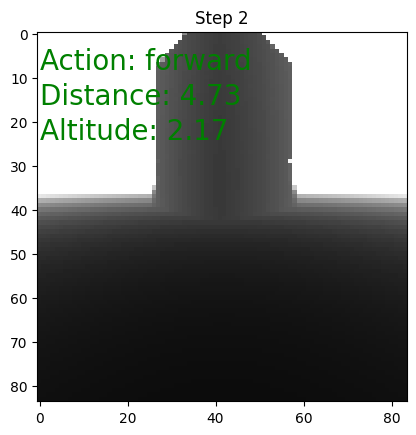

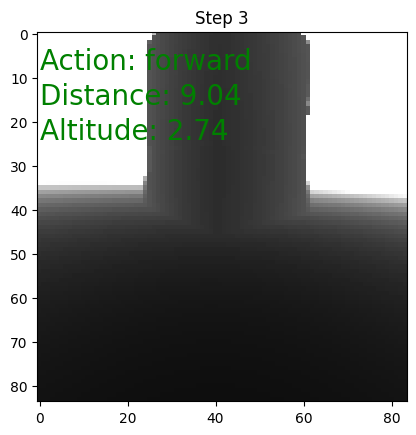

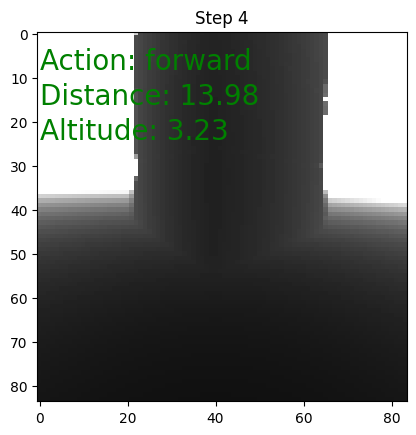

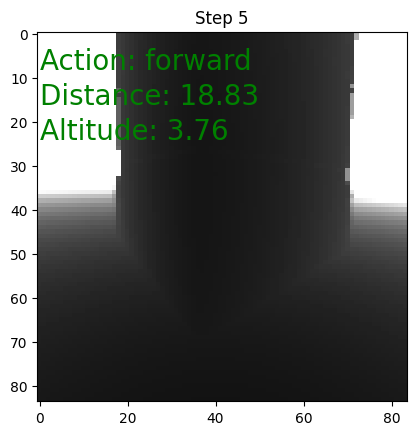

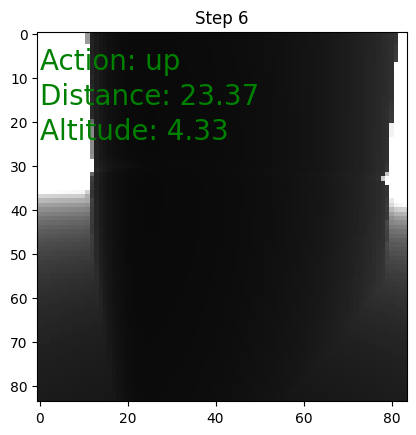

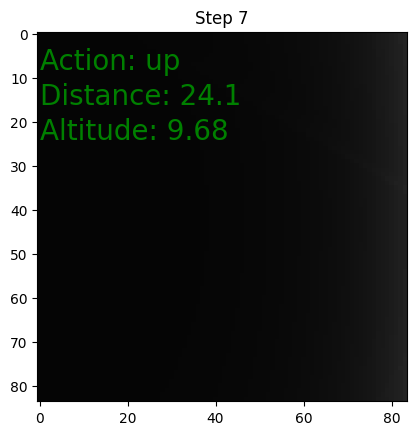

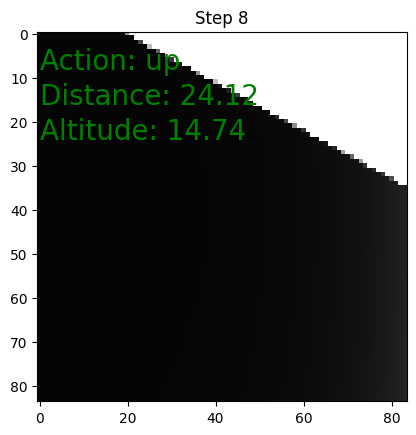

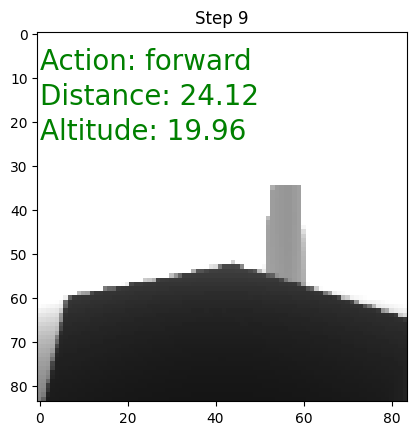

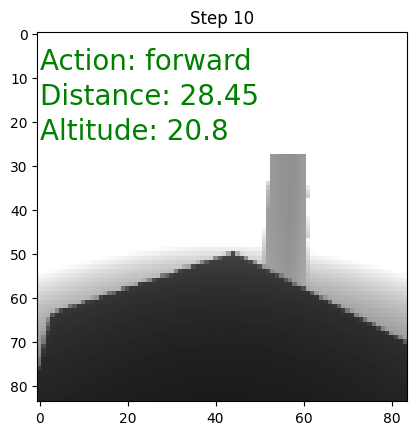

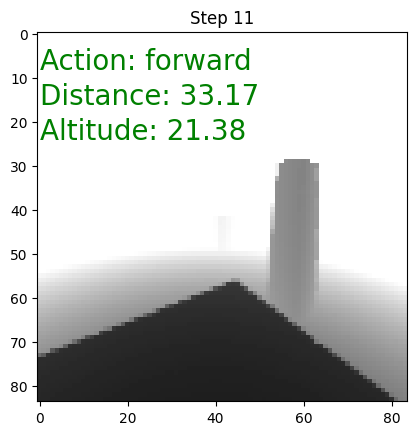

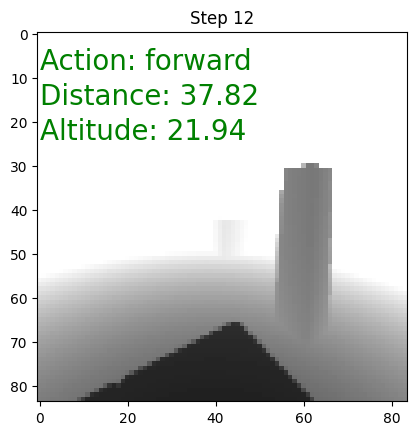

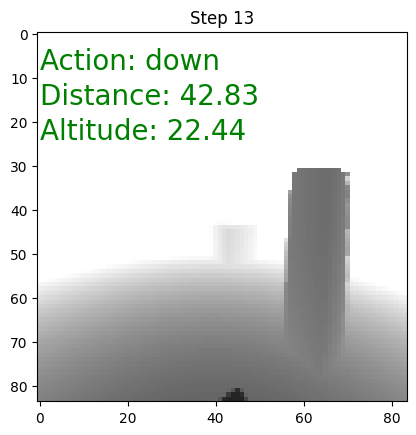

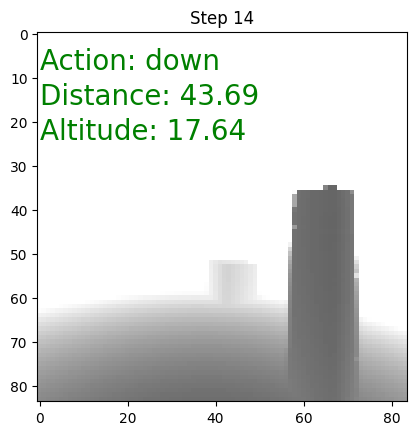

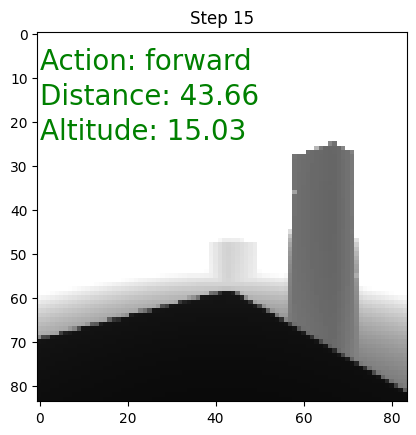

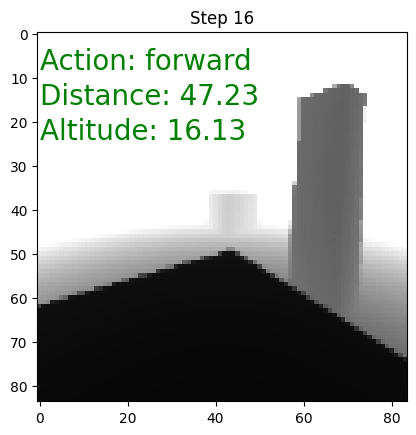

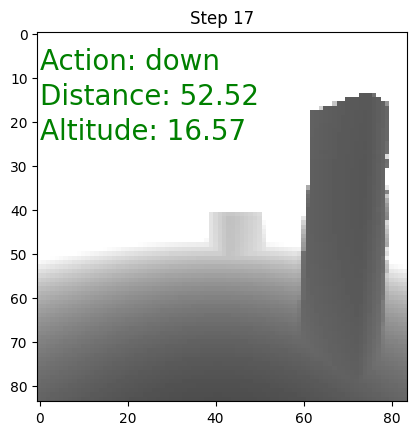

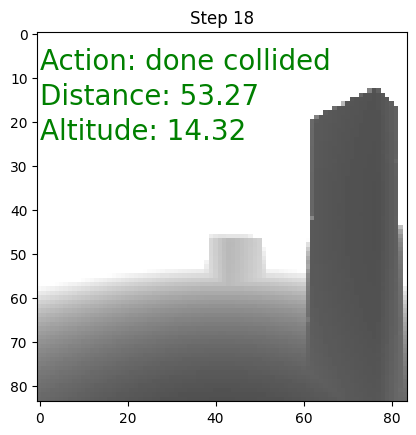

In [106]:
# get final paths data
last_evaluation = list(evaluations.keys())[-1]
last_evaluations = evaluations[last_evaluation]
observations = {}
state_variables = {}
for episode in last_evaluations:
    observations[episode] = []
    state_variables[episode] = []
    previous_state = last_evaluations[episode]['1']
    first_position = last_evaluations[episode]['1']['drone_position']
    for step in last_evaluations[episode]:
        state = last_evaluations[episode][step]
        observation = previous_state['observation_component']
        position = previous_state['drone_position']
        
        action = state['transcribed_action']
        distance = math.sqrt((position[0] - first_position[0])**2 + (position[1] - first_position[1])**2)
        altitude = -1*position[2]
        
        observations[episode].append(observation)
        state_vars = {
            'Action' : action,
            'Distance' : distance,
            'Altitude' : altitude
        }
        state_variables[episode].append(state_vars)
        previous_state = state
        
    state = last_evaluations[episode][str(len(last_evaluations[episode]))]
    observation = state['observation_component']
    position = state['drone_position']
    distance = math.sqrt((position[0] - first_position[0])**2 + (position[1] - first_position[1])**2)
    altitude = -1*position[2]
    state_vars = {
            'Action' : 'done ' + state['termination_reason'],
            'Distance' : distance,
            'Altitude' : altitude
        }
    observations[episode].append(observation)
    state_variables[episode].append(state_vars)
    
# make slideshow frames
font_dic = {'color':'green', 'size':20}
for episode in last_paths:
    print('Episode', episode)
    for step, observation in enumerate(observations[episode]):
        if step == 0:
            continue
        plt.title('Step ' + str(step))
        plt.imshow(mpimg.imread(observation_folder + observation + '.png'))
        plt.text(0, 8, 'Action: ' + str(state_variables[episode][step]['Action']), font_dic)
        plt.text(0, 16, 'Distance: ' + str(round(state_variables[episode][step]['Distance'],2)), font_dic)
        plt.text(0, 24, 'Altitude: ' + str(round(state_variables[episode][step]['Altitude'],2)), font_dic)
        plt.savefig(slideshow_path + episode + '_' + str(step) + '.png')
        plt.show()
        
# make video from frames
for episode in last_paths:
    frames = []
    for step, observation in enumerate(observations[episode]):
        if step == 0:
            continue
        frame_path = slideshow_path + episode + '_' + str(step) + '.png'
        frame = cv2.imread(frame_path)
        frames.append(frame)
    final_frame = cv2.imread(slideshow_path + episode + '_final.png')
    frames.append(frame)
    video_path = slideshow_path + 'Final_Evaluation_Episode_' + episode + '.avi'
    video = cv2.VideoWriter(
                            filename = video_path, 
                            fourcc = 0,
                            fps = 1,
                            frameSize = (640, 480),
                            isColor = True,
                           )
    for frame in frames:
        video.write(frame)
    cv2.destroyAllWindows()
    video.release()

# OBSERVATIONS

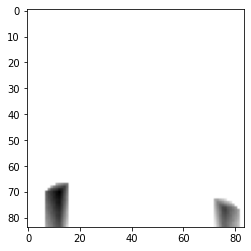

In [4]:
observations = {}
observation_files = [file for file in os.listdir(observation_folder)]
for observation_file in observation_files:
    observation_name = observation_file.split('.')[0]
    observations[observation_name] = imread(observation_folder + observation_file)
imshow(observations[observation_name], cmap='gray')

# BENCHMARKS

In [5]:
benchmarks = json.load(open(benchmarks_path, 'r'))
del benchmarks['event']
benchmarks

{'time': {'units': 'microseconds',
  'datastructs.datastruct.connect': [0.0],
  'maps.airsimmap.connect': [5493072.509765625],
  'drones.airsimdrone.check_collision': [0.0,
   0.0,
   999.45068359375,
   999.45068359375,
   999.9275207519531,
   0.0,
   999.45068359375,
   0.0,
   0.0,
   0.0,
   0.0,
   999.6891021728516,
   0.0,
   998.4970092773438,
   0.0,
   1000.4043579101562,
   0.0,
   999.45068359375,
   0.0,
   0.0,
   999.45068359375,
   0.0,
   0.0,
   0.0,
   999.45068359375,
   0.0,
   998.0201721191406,
   999.45068359375,
   999.45068359375,
   0.0,
   0.0,
   998.9738464355469,
   999.2122650146484,
   0.0,
   1000.1659393310547,
   0.0,
   0.0,
   0.0,
   999.2122650146484,
   999.6891021728516,
   998.9738464355469,
   0.0,
   999.6891021728516,
   999.6891021728516,
   998.9738464355469,
   999.45068359375,
   998.9738464355469,
   999.9275207519531,
   0.0,
   998.2585906982422,
   0.0,
   999.2122650146484,
   0.0,
   998.9738464355469,
   0.0,
   0.0,
   0.0,
   

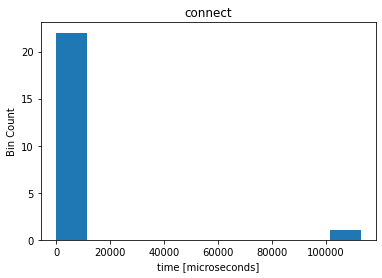

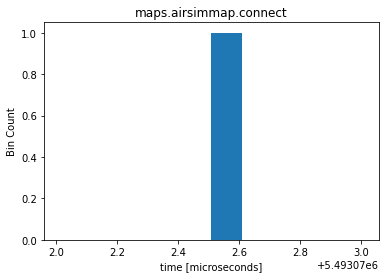

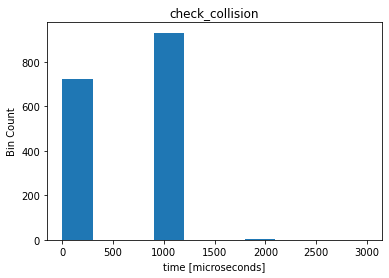

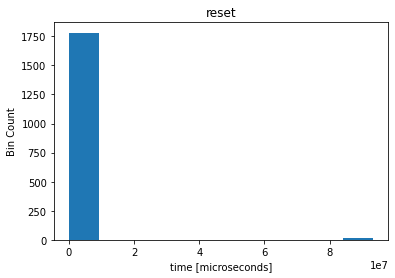

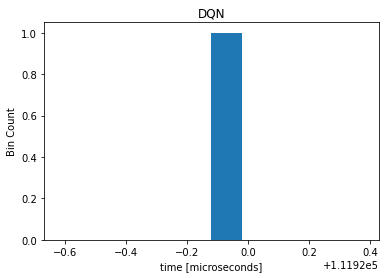

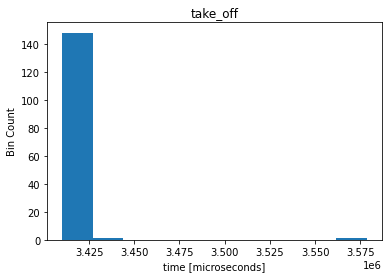

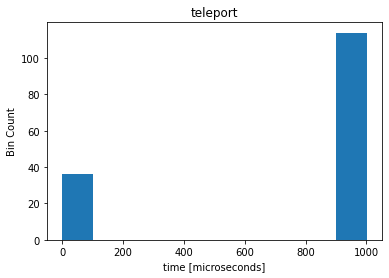

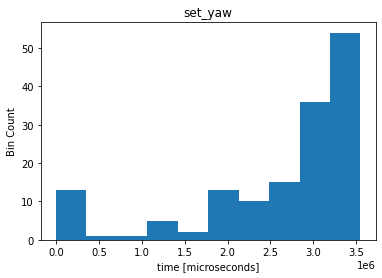

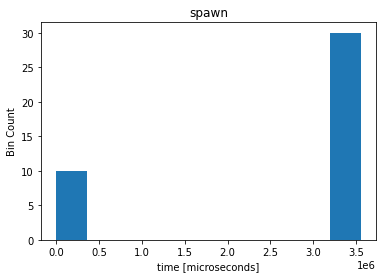

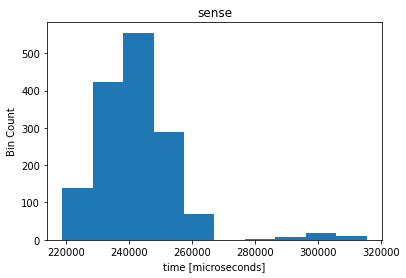

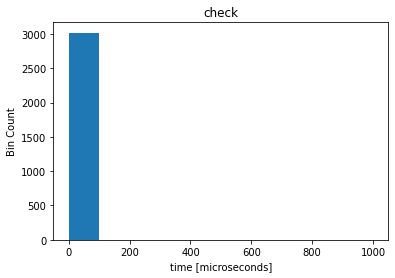

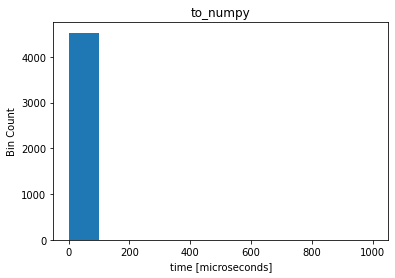

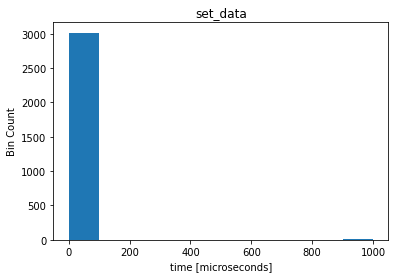

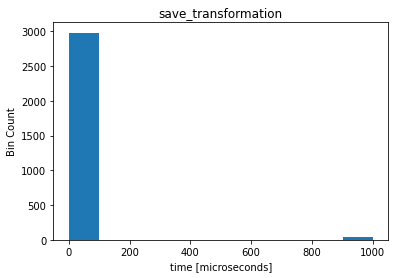

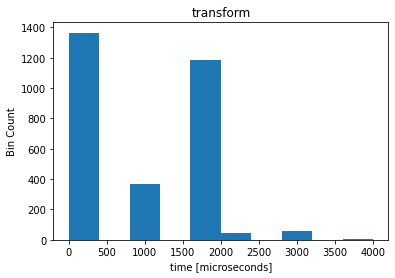

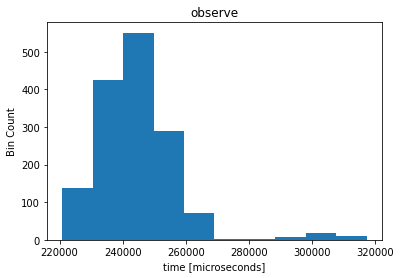

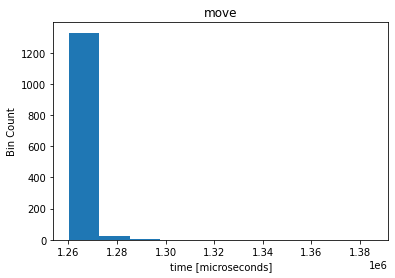

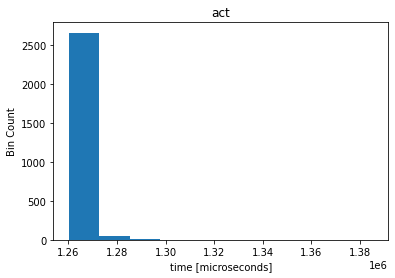

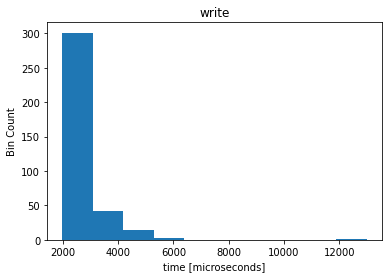

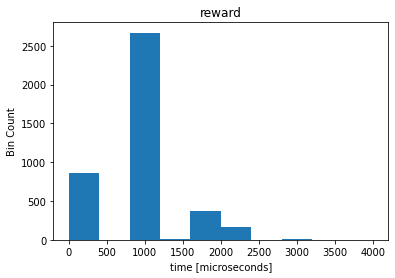

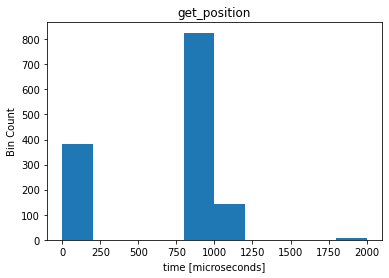

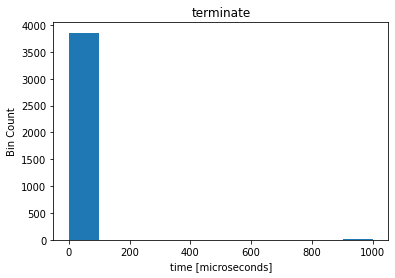

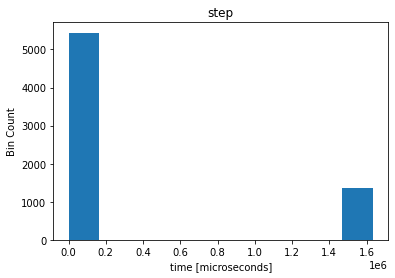

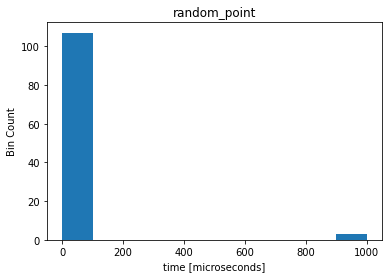

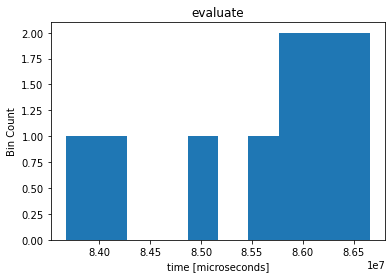

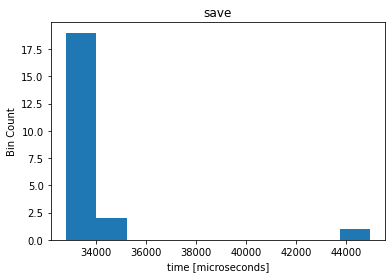

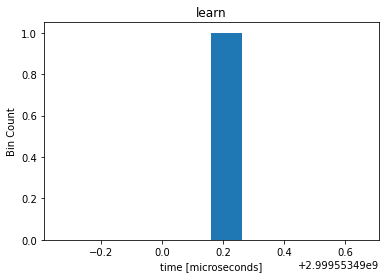

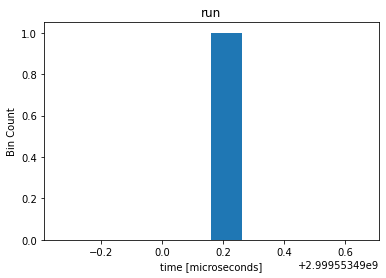

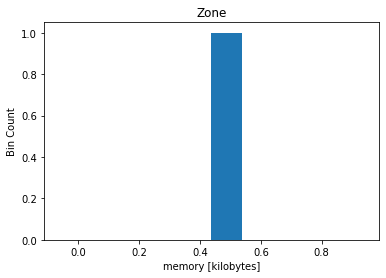

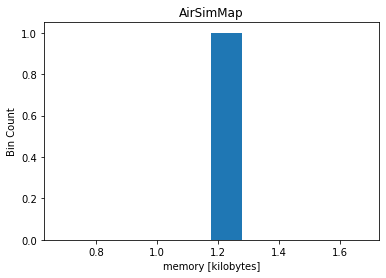

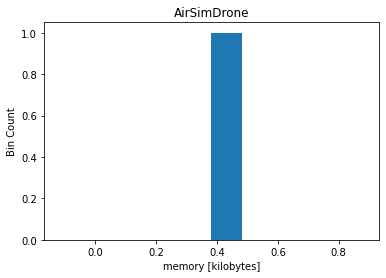

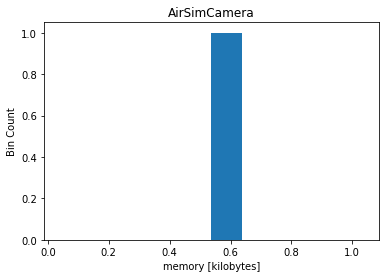

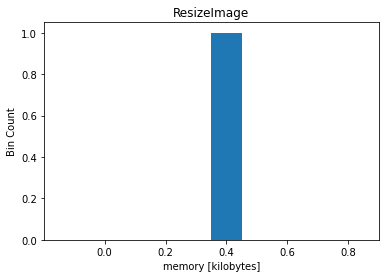

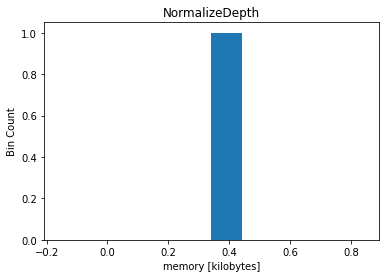

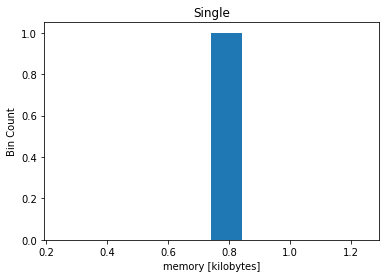

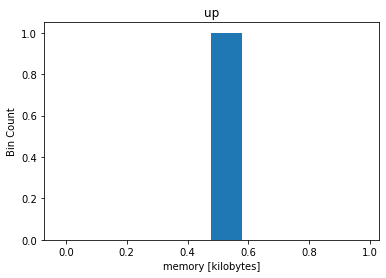

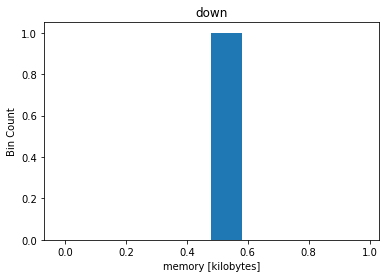

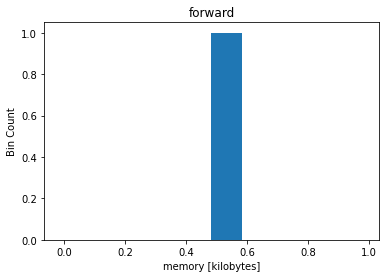

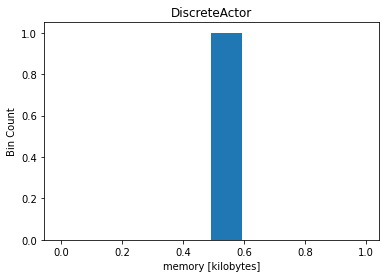

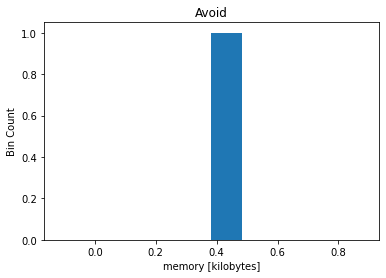

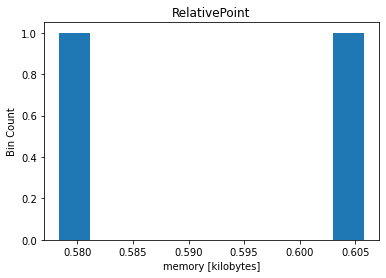

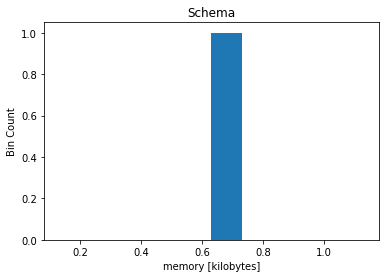

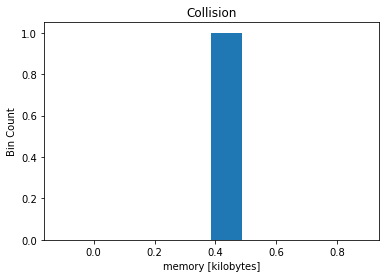

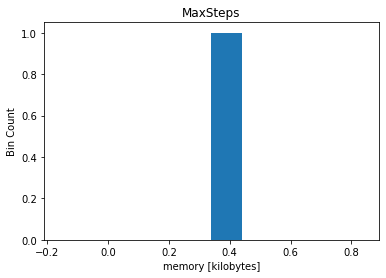

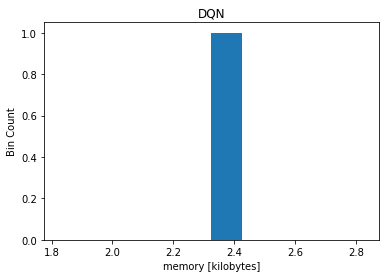

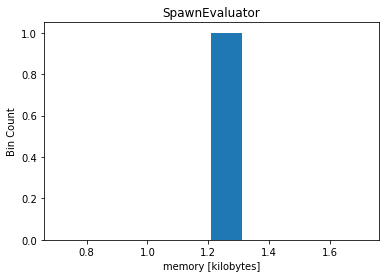

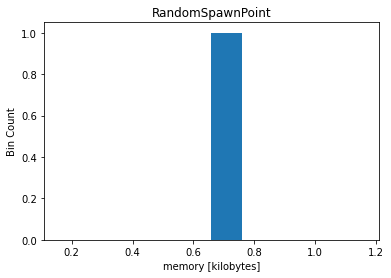

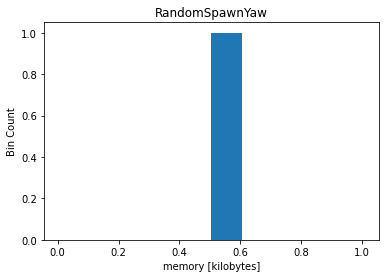

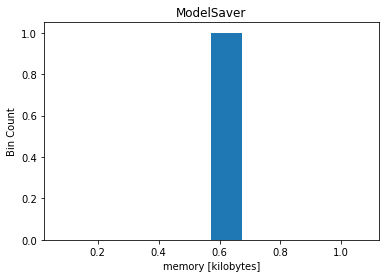

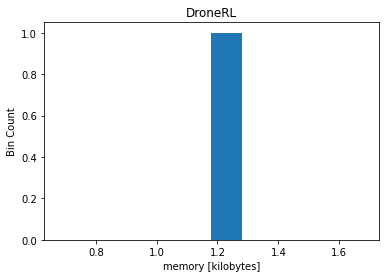

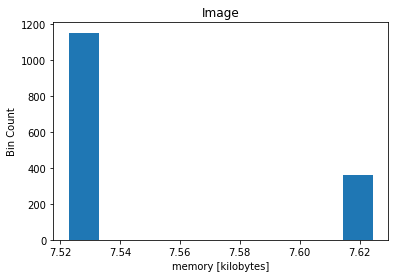

In [7]:
def aggregate_time_benchmarks(benchmarks):
    aggregated = {'units':benchmarks['time']['units']}
    for variable_name in benchmarks['time']:
        if variable_name == 'units':
            continue
        if variable_name in ['maps.airsimmap.connect', ]:
            method_name = variable_name
        else:
            method_name = variable_name.split('.')[-1]
        if method_name not in aggregated:
            aggregated[method_name] = []
        aggregated[method_name] = aggregated[method_name] + benchmarks['time'][variable_name]
    return aggregated
def aggregate_memory_benchmarks(benchmarks):
    aggregated = {'units':benchmarks['memory']['units']}
    for variable_name in benchmarks['memory']:
        if variable_name == 'units':
            continue
        class_name = variable_name.split('_')[0]
        if class_name not in aggregated:
            aggregated[class_name] = []
        aggregated[class_name] = aggregated[class_name] + benchmarks['memory'][variable_name]
    return aggregated
def visualize_benchmarks(benchmarks):
    for metric_name in benchmarks:
        units = benchmarks[metric_name]['units']
        for variable_name in benchmarks[metric_name]:
            if variable_name == 'units':
                continue
            measurements = benchmarks[metric_name][variable_name]
            plt.hist(measurements, 10)
            plt.xlabel(metric_name + ' [' + units + ']')
            plt.ylabel('Bin Count')
            plt.title(variable_name)
            plt.show()
benchmarks['time'] = aggregate_time_benchmarks(benchmarks)
benchmarks['memory'] = aggregate_memory_benchmarks(benchmarks)
visualize_benchmarks(benchmarks)

# CONFIGURATION

In [8]:
configuration = json.load(open(configuration_path, 'r'))
configuration

{'timestamp': '2022_8_26_10_52_44',
 'repo_version': 'alpha',
 'controller': {'type': 'Controller.TrainRL', 'model_component': 'DQN__1'},
 'Zone__1': {'type': 'DataStruct.Zone',
  'x_min': -5,
  'x_max': 5,
  'y_min': -5,
  'y_max': 5,
  'z_min': 0,
  'z_max': 0},
 'AirSimMap__1': {'type': 'Map.AirSimMap',
  'settings': {'SeeDocsAt': 'https://github.com/Microsoft/AirSim/blob/master/docs/settings.md',
   'SettingsVersion': 1.2,
   'SimMode': 'Multirotor',
   'ViewMode': 'SpringArmChase',
   'SubWindows': [{'WindowID': 0,
     'Camera_name': '0',
     'ImageType': 3,
     'Visible': True},
    {'WindowID': 2, 'Camera_name': '0', 'ImageType': 0, 'Visible': True}]},
  'settings_directory': 'maps/airsim_settings/',
  'setting_files': ['base'],
  'release_directory': 'resources/airsim_maps/',
  'release_relative_path': 'Blocks/',
  'release_name': 'Blocks.exe'},
 'AirSimDrone__1': {'type': 'Drone.AirSimDrone'},
 'AirSimCamera__1': {'type': 'Sensor.AirSimCamera',
  'camera_view': '0',
  'imag